<a href="https://colab.research.google.com/github/RifaldiAchmad/Data-Analysis-with-Python/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. How has the Company's Sales and Revenue Performed in the Last Few Months?
2. What products are selling the most and the least?
3. What are the demographics of our customers?
4. When was the last time a customer made a transaction?
5. How often has a customer made a purchase in the past few months?
6. How much money has a customer spent in the past few months?

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [103]:
all_df = pd.read_csv('https://raw.githubusercontent.com/RifaldiAchmad/Data-Analysis-with-Python/refs/heads/main/Dataset%20Clean/merge_all.csv')

# **How has the Company's Sales and Revenue Performed in the Last Few Months?**

In [104]:
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
  all_df[column] = pd.to_datetime(all_df[column])

In [105]:
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_date,order_count,revenue
0,2021-01,109,119333
1,2021-02,93,95080
2,2021-03,117,131364
3,2021-04,99,97530
4,2021-05,84,85597


We plan to resample the order_date data on a monthly basis and aggregate it to obtain information about the number of orders and the total revenue generated each month.

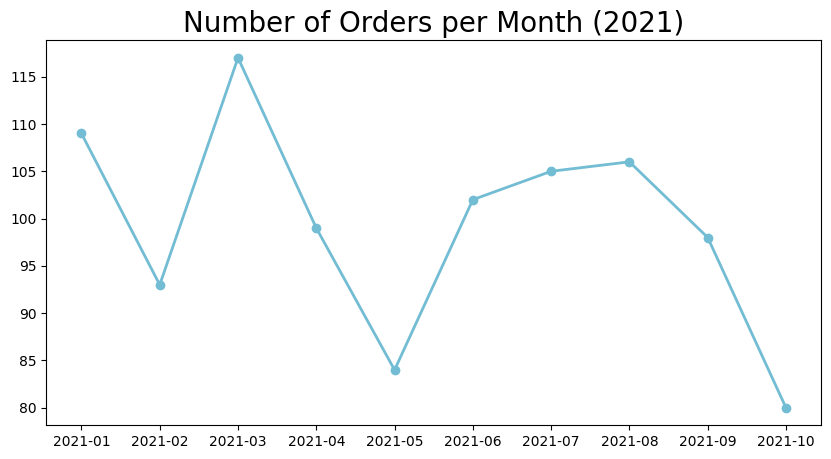

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Based on the visualization, we can observe that the highest number of orders occurred in March. Additionally, there is a noticeable decline in the number of orders in February, April, May, and October.

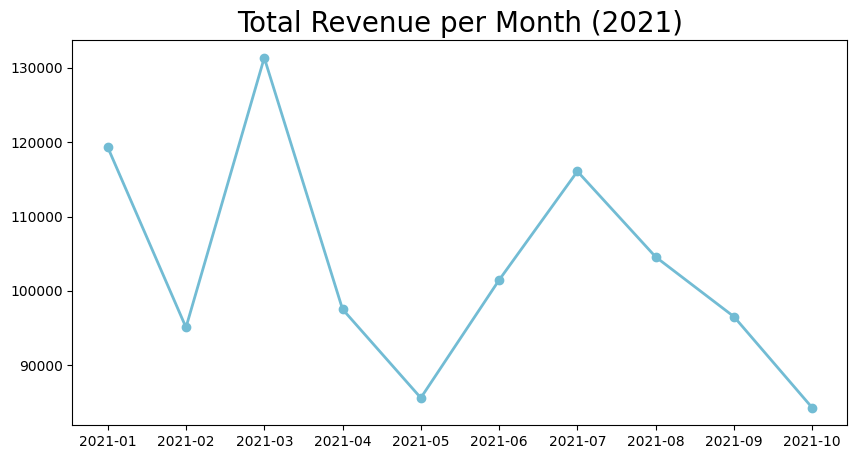

In [107]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

The significant decline in the number of orders in February, April, May, and October has impacted the company's revenue decline.

# **What Products Sell the Most and Least?**

In [108]:
sum_order_items_df = all_df.groupby("product_name").quantity_sal.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_name,quantity_sal
0,Denim,527
1,Joggers,334
2,Pleated,308
3,Casual Slim Fit,306
4,Shearling,302
5,Relaxed Leg,301
6,Trench Coat,299
7,Puffer,298
8,Bomber,297
9,Chambray,290


<ipython-input-109-700100198b51>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_sal", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
<ipython-input-109-700100198b51>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="quantity_sal", y="product_name", data=sum_order_items_df.sort_values("quantity_sal", ascending=True).head(5), palette=colors, ax=ax[1])


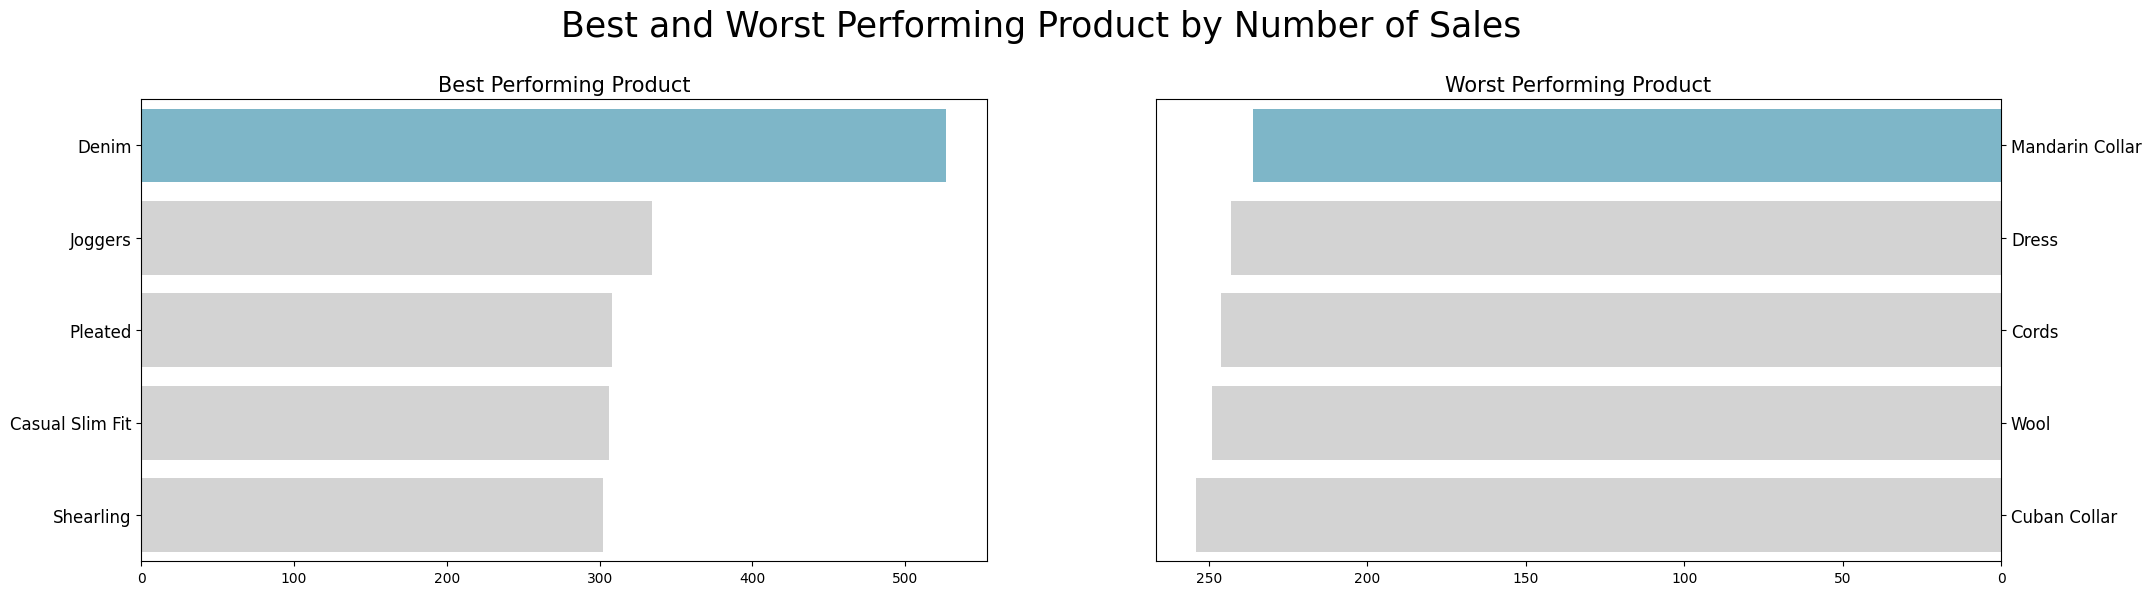

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Best Performing Product
sns.barplot(x="quantity_sal", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# Worst Performing Product
sns.barplot(x="quantity_sal", y="product_name", data=sum_order_items_df.sort_values("quantity_sal", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=25, y=1.03)
plt.show()

Based on the image above, you can see that Denim is the best-selling product. In contrast, Mandarin Collar is the least sold product.

# **What are the Demographics of Our Customers?**

**Based on Gender**

<ipython-input-110-ad309ee4b24c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-110-ad309ee4b24c>:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


Text(0.5, 0, '')

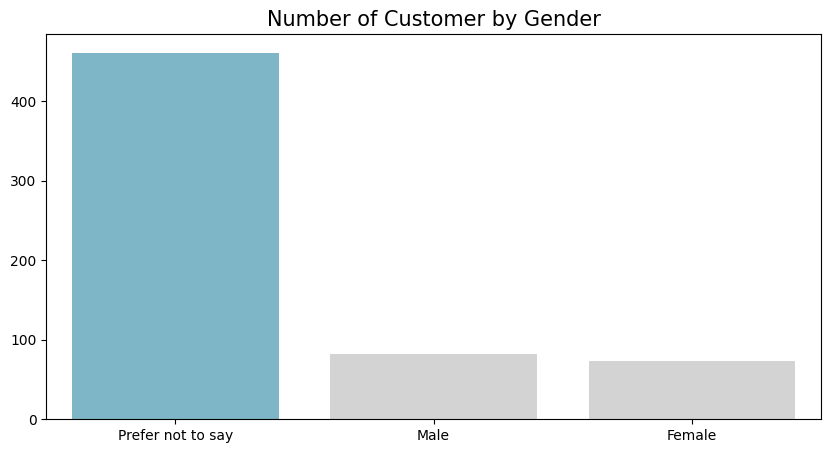

In [110]:
bygender_df = all_df.groupby("gender").customer_id.nunique().reset_index()
bygender_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="gender",
    data=bygender_df.sort_values("customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)

Based on the chart above, it is evident that most customers are unwilling to disclose information about their gender.

**Based on Age**

<ipython-input-111-73b460b07b66>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-111-73b460b07b66>:10: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(


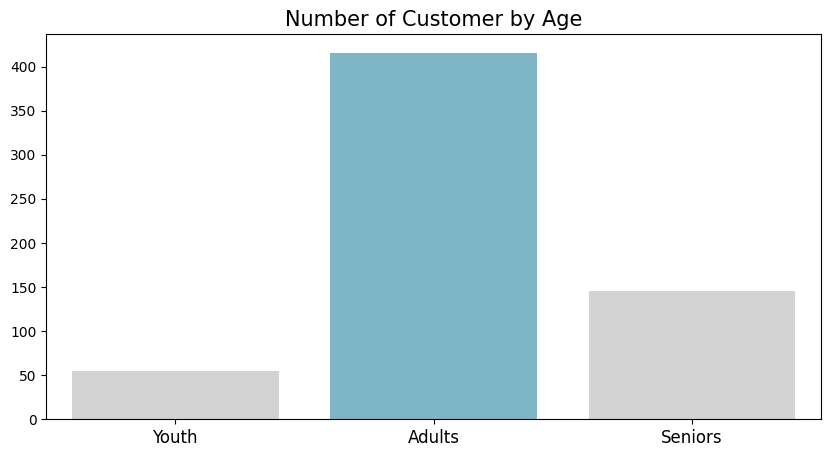

In [111]:
byage_df = all_df.groupby("age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

byage_df["age_group"] = pd.Categorical(byage_df["age_group"], ["Youth", "Adults", "Seniors"])
plt.figure(figsize=(10, 5))
colors_2 = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="age_group",
    data=byage_df,
    palette=colors_2
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

<ipython-input-112-5974a4f3ca7a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


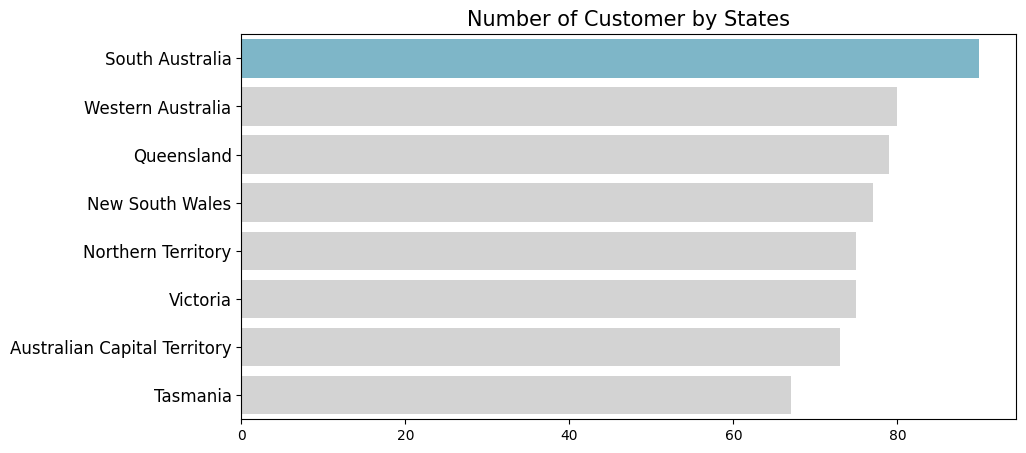

In [112]:
bystate_df = all_df.groupby("state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_3 = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="state",
    data=bystate_df.sort_values("customer_count", ascending=False),
    palette=colors_3
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Based on the data visualization, it can be observed that the majority of our customers are from South Australia.

# **RFM (Recency, Frequency, Monetary) Analysis**

In [113]:
rfm_df = all_df.groupby("customer_id", as_index=False).agg({
    "order_date": "max", # take last order date
    "order_id": "nunique", # calculate the number of orders
    "total_price": "sum" # calculate the amount of revenue generated
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# Calculate when the customer last made a transaction (day)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date

recent_date = all_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head().sort_values("recency", ascending=False).reset_index(drop=True)

,customer_id,frequency,monetary,recency
0,10,1,270,229
1,1,3,1641,203
2,7,1,1017,156
3,11,1,382,149
4,12,1,1551,127


<ipython-input-114-c6dea78bbd87>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values("recency", ascending=True).head(5), palette=colors_4, ax=ax[0])
<ipython-input-114-c6dea78bbd87>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values("frequency", ascending=False).head(5), palette=colors_4, ax=ax[1])
<ipython-input-114-c6dea78bbd87>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values("mo

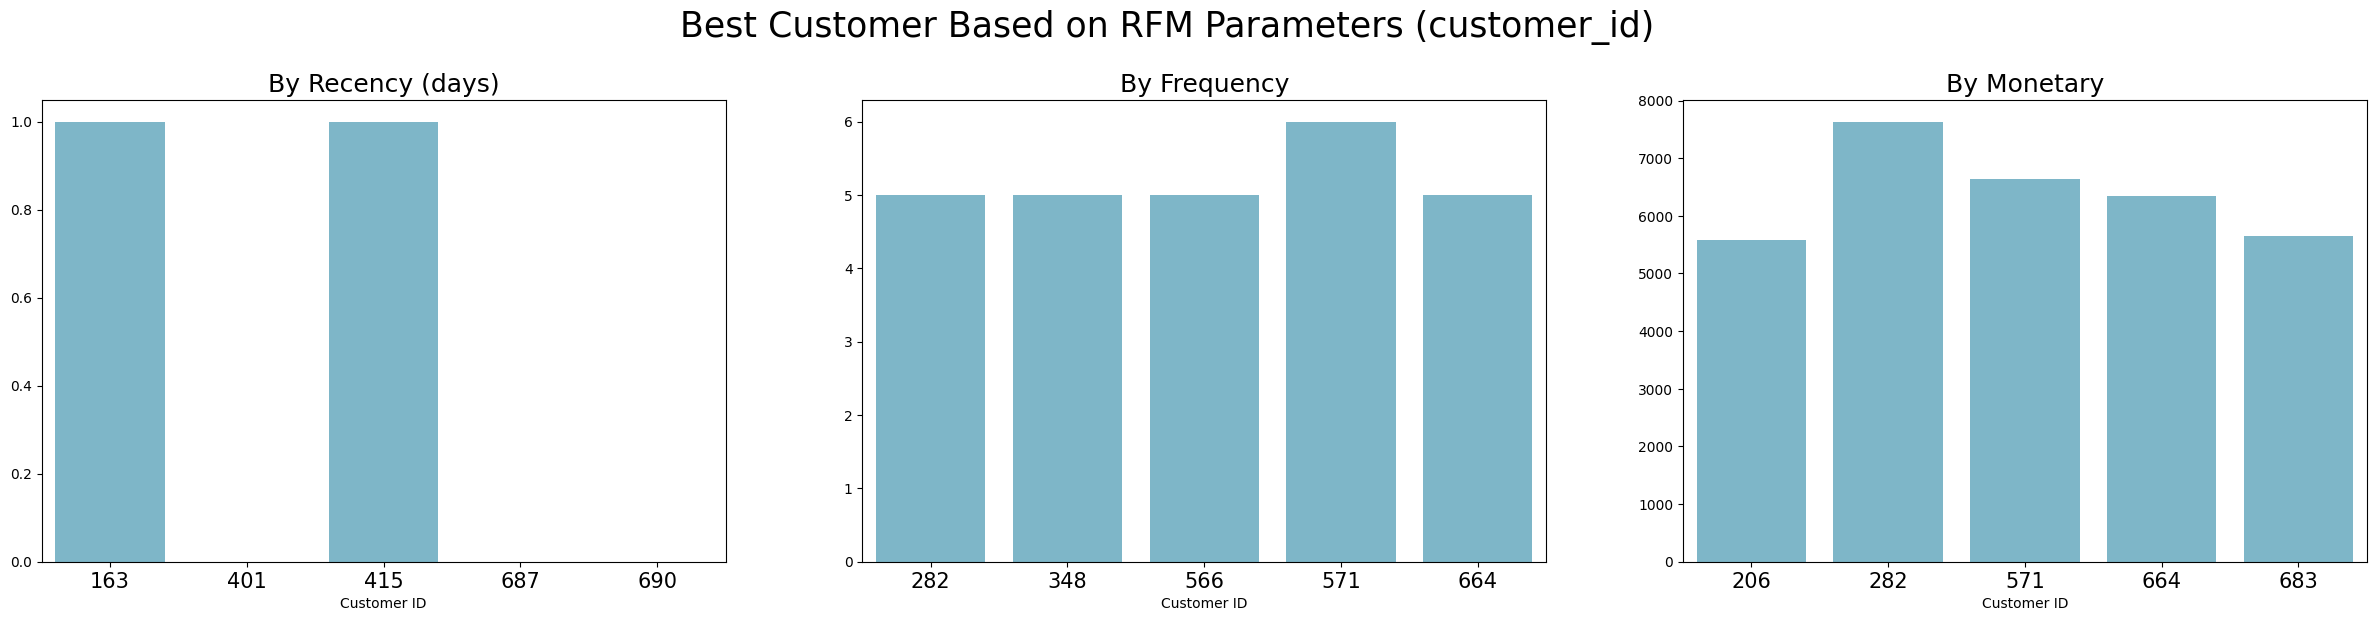

In [114]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors_4 = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values("recency", ascending=True).head(5), palette=colors_4, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Customer ID")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values("frequency", ascending=False).head(5), palette=colors_4, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Customer ID")
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values("monetary", ascending=False).head(5), palette=colors_4, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel("Customer ID")
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=25, y=1.03)
plt.show()

From the data visualization above, we can identify some of the top customers based on those three parameters.

# **Customer Segmentation Based on RFM score**

In [115]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,1,3,1641,203,133.0,560.0,351.0
1,7,1,1017,156,215.5,179.5,195.5
2,10,1,270,229,83.0,179.5,11.0
3,11,1,382,149,233.0,179.5,21.0
4,12,1,1551,127,267.5,179.5,330.0


Sort customers by recency, frequency, and monetary score based on each ranking

In [116]:
# Normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,1,3,1641,203,21.626016,90.909091,56.980519
1,7,1,1017,156,35.040650,29.139610,31.737013
2,10,1,270,229,13.495935,29.139610,1.785714
3,11,1,382,149,37.886179,29.139610,3.409091
4,12,1,1551,127,43.495935,29.139610,53.571429


In [119]:
rfm_df['RFM_score'] = 0.15 * rfm_df['r_rank_norm'] + 0.28 * rfm_df['f_rank_norm'] + 0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7).sort_values('RFM_score', ascending=False).reset_index(drop=True)

,customer_id,RFM_score
0,15,3.84
1,1,3.06
2,12,2.26
3,7,1.58
4,13,1.14
5,11,0.79
6,10,0.56


Calculates the RFM score for each customer using a weighted combination of the normalized values ​​for each parameter.

In [124]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(10)

,customer_id,RFM_score,customer_segment
0,1,3.06,Medium value customer
1,7,1.58,lost customers
2,10,0.56,lost customers
3,11,0.79,lost customers
4,12,2.26,Low value customers
5,13,1.14,lost customers
6,15,3.84,Medium value customer
7,16,2.33,Low value customers
8,18,3.30,Medium value customer
9,19,1.68,Low value customers


In [134]:
customer_segment_df = rfm_df.groupby("customer_segment", as_index=False)["customer_id"].nunique().sort_values("customer_id", ascending=False).reset_index(drop=True)
customer_segment_df

,customer_segment,customer_id
0,Low value customers,204
1,lost customers,190
2,Medium value customer,137
3,High value customer,50
4,Top customers,35


<ipython-input-135-e250edb3123f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


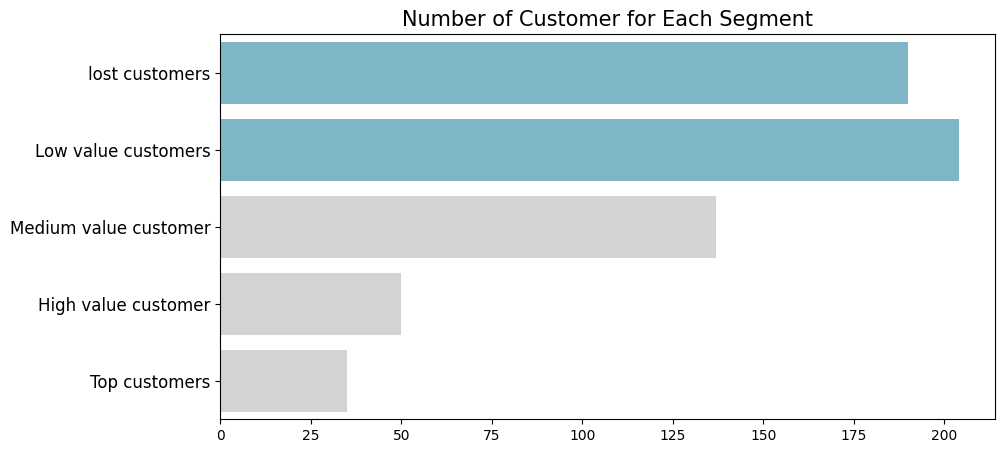

In [135]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

plt.figure(figsize=(10, 5))
colors_5 = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_5
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()